In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import pandas as pd
import os

In [2]:
file_path = '/content/drive/My Drive/final_cloth_img.csv'

In [3]:
#file_path = os.path.join('.','final_cloth_img.csv')

In [4]:
#cloth_img=pd.read_csv(file_path)

In [5]:
file_path = '/content/drive/My Drive/final_footwear_img.csv'


In [6]:
footwear_img=pd.read_csv(file_path)

In [7]:

# footwear_img=pd.read_csv('final_footwear_img.csv')

In [8]:
#folder_path=os.path.join('.','images')

In [9]:
folder_path='/content/drive/My Drive/images'

In [10]:
#imgs_df=pd.concat([cloth_img,footwear_img],ignore_index=True)

In [11]:
imgs_df=footwear_img

In [12]:
imgs_df

,id,masterCategory,subCategory,articleType,filename
0,15738,Footwear,Flip Flops,Flip Flops,15738.jpg
1,17651,Footwear,Flip Flops,Flip Flops,17651.jpg
2,44209,Footwear,Flip Flops,Flip Flops,44209.jpg
3,15387,Footwear,Flip Flops,Flip Flops,15387.jpg
4,21202,Footwear,Flip Flops,Flip Flops,21202.jpg
...,...,...,...,...,...
342,1786,Footwear,Shoes,Sports Shoes,1786.jpg
343,15719,Footwear,Shoes,Sports Shoes,15719.jpg
344,23929,Footwear,Shoes,Sports Shoes,23929.jpg
345,5393,Footwear,Shoes,Sports Shoes,5393.jpg


In [13]:
imgs_df['label']=imgs_df['masterCategory']+'_'+imgs_df['subCategory']+'_'+imgs_df['articleType']

In [14]:
imgs_df.head()

,id,masterCategory,subCategory,articleType,filename,label
0,15738,Footwear,Flip Flops,Flip Flops,15738.jpg,Footwear_Flip Flops_Flip Flops
1,17651,Footwear,Flip Flops,Flip Flops,17651.jpg,Footwear_Flip Flops_Flip Flops
2,44209,Footwear,Flip Flops,Flip Flops,44209.jpg,Footwear_Flip Flops_Flip Flops
3,15387,Footwear,Flip Flops,Flip Flops,15387.jpg,Footwear_Flip Flops_Flip Flops
4,21202,Footwear,Flip Flops,Flip Flops,21202.jpg,Footwear_Flip Flops_Flip Flops


In [15]:
imgs_df['label'].unique()


array(['Footwear_Flip Flops_Flip Flops', 'Footwear_Sandal_Sandals',
       'Footwear_Shoes_Casual Shoes', 'Footwear_Shoes_Formal Shoes',
       'Footwear_Shoes_Sports Shoes'], dtype=object)

In [16]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torchvision import models, transforms
from torch.utils.data import Dataset, DataLoader
from PIL import Image
import numpy as np
import os
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [17]:
target_size = (224, 224)

In [18]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision import models, transforms
import numpy as np


In [19]:
from PIL import Image
import numpy as np

def preprocess_images(imgs_df, folder_path, target_size=(224, 224)):
    """
    Preprocess images and labels without TensorFlow.

    Args:
        imgs_df: DataFrame containing image metadata (e.g., filename, category, label).
        folder_path: Root folder containing the images.
        target_size: Tuple specifying the target size of the image (width, height).

    Returns:
        images: Numpy array of preprocessed images.
        labels: List of corresponding labels.
    """
    images = []
    labels = []

    for ind, row in imgs_df.iterrows():
       # try:
            # Build the file path based on the category
            if row['masterCategory'] == 'Apparel':
                file_path = f"{folder_path}/clothing/{row['filename']}"
            elif row['masterCategory'] == 'Footwear':
                file_path = f"{folder_path}/foot wear/{row['filename']}"
            # else:
            #     continue  # Skip rows with other categories

            # # Load the image using Pillow
            #img = Image.open(file_path).convert('RGB')

            # # Resize the image
            # img = img.resize(target_size)

            # # Convert the image to a numpy array
            # img_array = np.asarray(img, dtype=np.float32)

            # # Normalize the image to match ResNet preprocessing
            # img_array /= 255.0  # Scale pixel values to [0, 1]


            # Append the preprocessed image and label
            images.append(file_path)
            labels.append(row['label'])

        # except Exception as e:
        #     print(f"Error processing file {row['id']}: {e}")

    # Convert the list of images to a numpy array
    #images = np.array(images)

    return images, labels


In [20]:
images, labels = preprocess_images(imgs_df, folder_path, target_size)

In [21]:
from sklearn.preprocessing import LabelEncoder

# Encode string labels to integers
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)

print(f"Encoded labels: {encoded_labels}")

Encoded labels: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4]


In [22]:
import numpy as np

def create_image_pairs(images, labels, target_pair_count=2000):
    """
    Create at least `target_pair_count` pairs of images and their corresponding labels (1 for similar, 0 for dissimilar).

    Args:
    - images: Array of preprocessed images.
    - labels: Array of labels corresponding to the images.
    - target_pair_count: Total number of pairs to generate.

    Returns:
    - pairs: Array of paired images.
    - pair_labels: Array of labels for the pairs (1: similar, 0: dissimilar).
    """
    pairs = []
    pair_labels = []
    unique_labels = np.unique(labels)
    #print('here')
    label_indices = {label: np.where(labels == label)[0] for label in unique_labels}
    print(label_indices)
    #print('here_1')

    # Calculate number of positive and negative pairs
    num_positive_pairs = target_pair_count // 2
    num_negative_pairs = target_pair_count - num_positive_pairs

    # Generate positive pairs
    while len(pairs) < num_positive_pairs:
        #print('h3')
        for label, indices in label_indices.items():
            if len(indices) < 2:
                continue  # Skip if not enough samples for positive pairs
            i, j = np.random.choice(indices, size=2, replace=False)
            pairs.append([images[i], images[j]])
            pair_labels.append(1)
            #print('1')
            if len(pairs) >= num_positive_pairs:
                break

    # Generate negative pairs
    while len(pairs) < target_pair_count:
        for label, indices in label_indices.items():
            i = np.random.choice(indices)
            neg_label = np.random.choice(unique_labels[unique_labels != label])
            j = np.random.choice(label_indices[neg_label])
            pairs.append([images[i], images[j]])
            pair_labels.append(0)
            #print('0')
            if len(pairs) >= target_pair_count:
                break

    return np.array(pairs), np.array(pair_labels)


In [23]:
# Assuming `images` is a numpy array of preprocessed images and `labels` is a numpy array of their labels
pairs, pair_labels = create_image_pairs(images, encoded_labels, target_pair_count=15000)
print(f"Number of pairs: {len(pairs)}")
print(f"Pair labels distribution: {np.unique(pair_labels, return_counts=True)}")

{0: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69]), 1: array([ 70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,
        83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,
        96,  97,  98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108,
       109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121,
       122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134,
       135, 136, 137, 138, 139]), 2: array([140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152,
       153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165,
       166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178,
       179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 1

In [24]:
class ProductDataset(Dataset):
    def __init__(self, pairs, labels, transform=None):
        self.pairs = pairs
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.pairs)

    def __getitem__(self, idx):
        img1_path, img2_path = self.pairs[idx]
        label = self.labels[idx]

        img1 = Image.open(img1_path).convert('RGB')
        img2 = Image.open(img2_path).convert('RGB')

        if self.transform:
            img1 = self.transform(img1)
            img2 = self.transform(img2)

        return img1, img2, torch.tensor(label, dtype=torch.float32)


In [25]:
class AttentionModule(nn.Module):
    def __init__(self, embedding_dim):
        super(AttentionModule, self).__init__()
        self.attention = nn.Sequential(
            nn.Linear(embedding_dim, embedding_dim),
            nn.ReLU(),
            nn.Softmax(dim=-1)
        )

    def forward(self, x):
        attention_weights = self.attention(x)
        return x * attention_weights

class SiameseNetwork(nn.Module):
    def __init__(self, feature_extractor, embedding_dim):
        super(SiameseNetwork, self).__init__()
        self.feature_extractor = feature_extractor
        self.pooling = nn.AdaptiveAvgPool2d((1, 1))  # Global average pooling
        self.attention = AttentionModule(embedding_dim)
        self.fc = nn.Sequential(
            nn.Linear(embedding_dim, 128),
            nn.BatchNorm1d(128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, 1),
            nn.Sigmoid()
        )

    def forward(self, img1, img2):
        # Extract embeddings
        embedding1 = self.feature_extractor(img1)
        embedding2 = self.feature_extractor(img2)

        # Apply global average pooling to flatten feature maps
        embedding1 = self.pooling(embedding1).view(embedding1.size(0), -1)  # [batch_size, embedding_dim]
        embedding2 = self.pooling(embedding2).view(embedding2.size(0), -1)  # [batch_size, embedding_dim]

        # Attention mechanism
        embedding1 = self.attention(embedding1)
        embedding2 = self.attention(embedding2)

        # Compute similarity
        diff = torch.abs(embedding1 - embedding2)
        return self.fc(diff)



In [26]:
class ContrastiveLoss(nn.Module):
    def __init__(self, margin=1.0):
        super(ContrastiveLoss, self).__init__()
        self.margin = margin

    def forward(self, output1, output2, label):
        euclidean_distance = F.pairwise_distance(output1, output2)
        loss = torch.mean((1 - label) * torch.pow(euclidean_distance, 2) +
                          label * torch.pow(torch.clamp(self.margin - euclidean_distance, min=0.0), 2))
        return loss


In [27]:
# Data transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Split pairs into train, validation, and test sets
#pairs, labels = ...  # Load or prepare your image pairs and labels here
train_pairs, test_pairs, train_labels, test_labels = train_test_split(pairs,pair_labels, test_size=0.2, random_state=42)
train_pairs, val_pairs, train_labels, val_labels = train_test_split(train_pairs, train_labels, test_size=0.25, random_state=42)

# Datasets and DataLoaders
train_dataset = ProductDataset(train_pairs, train_labels, transform=transform)
val_dataset = ProductDataset(val_pairs, val_labels, transform=transform)
test_dataset = ProductDataset(test_pairs, test_labels, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)


In [28]:
# Load pretrained MobileNetV2 as feature extractor
feature_extractor = models.mobilenet_v2(pretrained=True)
feature_extractor = nn.Sequential(*list(feature_extractor.children())[:-1])  # Remove classifier
embedding_dim = 1280  # MobileNetV2 output size
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Initialize Siamese Network
siamese_network = SiameseNetwork(feature_extractor, embedding_dim).to(device)

# Loss and Optimizer
criterion = nn.BCELoss()
optimizer = optim.Adam(siamese_network.parameters(), lr=0.0001, weight_decay=1e-4)


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V2_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V2_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [29]:
epochs = 10
train_losses, val_losses = [], []

for epoch in range(epochs):
    # Training
    siamese_network.train()
    train_loss = 0.0
    for img1, img2, labels in train_loader:
        img1, img2, labels = img1.to(device), img2.to(device), labels.to(device)

        # Forward pass
        outputs = siamese_network(img1, img2).squeeze()
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        train_loss += loss.item()

    train_loss /= len(train_loader)
    train_losses.append(train_loss)

    # Validation
    siamese_network.eval()
    val_loss = 0.0
    with torch.no_grad():
        for img1, img2, labels in val_loader:
            img1, img2, labels = img1.to(device), img2.to(device), labels.to(device)
            outputs = siamese_network(img1, img2).squeeze()
            loss = criterion(outputs, labels)
            val_loss += loss.item()

    val_loss /= len(val_loader)
    val_losses.append(val_loss)

    print(f"Epoch {epoch+1}/{epochs}, Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}")


Epoch 1/10, Train Loss: 0.3377, Val Loss: 0.0376
Epoch 2/10, Train Loss: 0.0397, Val Loss: 0.0144
Epoch 3/10, Train Loss: 0.0394, Val Loss: 0.0049
Epoch 4/10, Train Loss: 0.0174, Val Loss: 0.0075
Epoch 5/10, Train Loss: 0.0090, Val Loss: 0.0020
Epoch 6/10, Train Loss: 0.0076, Val Loss: 0.0023
Epoch 7/10, Train Loss: 0.0158, Val Loss: 0.0188
Epoch 8/10, Train Loss: 0.0116, Val Loss: 0.0009
Epoch 9/10, Train Loss: 0.0062, Val Loss: 0.0008
Epoch 10/10, Train Loss: 0.0064, Val Loss: 0.0006


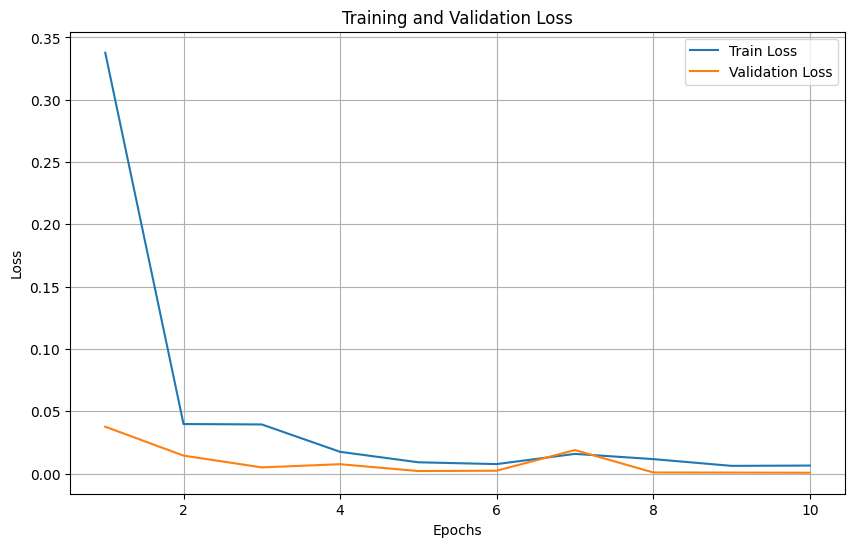

In [30]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, epochs + 1), train_losses, label='Train Loss')
plt.plot(range(1, epochs + 1), val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.show()


In [31]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def test_model(model, test_loader, threshold=0.5):
    model.eval()  # Set the model to evaluation mode
    true_labels = []
    predicted_scores = []

    with torch.no_grad():
        for img1, img2, labels in test_loader:
            img1, img2, labels = img1.to(device), img2.to(device), labels.to(device)

            # Get similarity scores from the model
            outputs = model(img1, img2).squeeze()
            predicted_scores.extend(outputs.cpu().numpy())
            true_labels.extend(labels.cpu().numpy())

    # Convert predicted scores to binary predictions
    predicted_labels = [1 if score > threshold else 0 for score in predicted_scores]

    # Calculate metrics
    accuracy = accuracy_score(true_labels, predicted_labels)
    precision = precision_score(true_labels, predicted_labels)
    recall = recall_score(true_labels, predicted_labels)
    f1 = f1_score(true_labels, predicted_labels)

    print(f"Test Accuracy: {accuracy * 100:.2f}%")
    print(f"Test Precision: {precision:.2f}")
    print(f"Test Recall: {recall:.2f}")
    print(f"Test F1-Score: {f1:.2f}")

    return accuracy, precision, recall, f1


In [32]:
# Assuming `siamese_network` is your trained model and `test_loader` is your DataLoader for test data
test_accuracy, test_precision, test_recall, test_f1 = test_model(siamese_network, test_loader)


Test Accuracy: 100.00%
Test Precision: 1.00
Test Recall: 1.00
Test F1-Score: 1.00


In [34]:
# Convert numpy arrays to tuples for compatibility with sets
train_pairs_set = set([tuple(pair) for pair in train_pairs])
val_pairs_set = set([tuple(pair) for pair in val_pairs])
test_pairs_set = set([tuple(pair) for pair in test_pairs])

# Check overlaps
overlap_with_train = len(test_pairs_set.intersection(train_pairs_set))
overlap_with_val = len(test_pairs_set.intersection(val_pairs_set))

print(f"Overlap with Training Set: {overlap_with_train}")
print(f"Overlap with Validation Set: {overlap_with_val}")


Overlap with Training Set: 320
Overlap with Validation Set: 121


In [ ]:
torch.save(siamese_network.state_dict(), "siamese_network_4.pth")


In [35]:
len(train_pairs)

9000

In [36]:
len(test_pairs)

3000

In [ ]:
len(validation_pa)